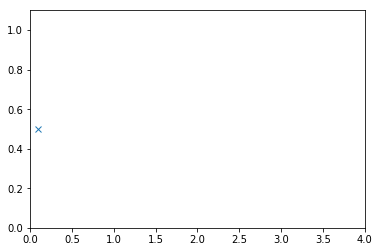

In [23]:
%matplotlib inline   
# con inline se pone show al final, en el caso de poner notebook no hace falta el show
import matplotlib.pyplot as plt   #importar biblioteca y renombrarla a plt
import numpy as np

plt.plot(0.1, 0.5,'x')
plt.ylim(0.0,1.1)
plt.xlim(0.0, 4.0)  #numeros de la parte inferior de la grafica

plt.show()